##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 3 Report

## Group Members: Akash Shetty, Helen Lai
## Group Name for Leaderboard: Asians

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math as math

from PIL import Image 
%matplotlib inline

### Exercise 1: Generalized function for subsetting pixels

<img src="lab3_exercise1.png" width="1000">

In [2]:
e1_img = Image.open('sample_image_1.jpg').convert('L')
e1_img = np.array(e1_img)     # 8-bit code grayscale

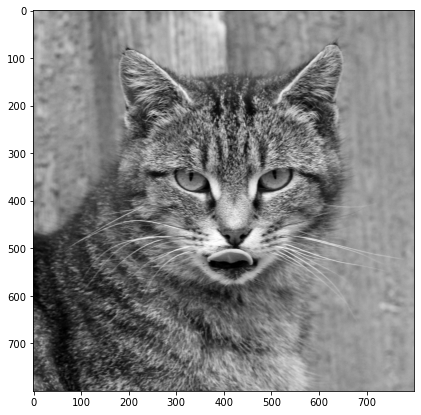

In [3]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e1_img, cmap = 'gray')

In [4]:
def subset_pixels(image, min_pixel_depth, max_pixel_depth, replacement_val):
    # Make sure you create a copy of the image via new_image = image.copy() to avoid tempering the global variable
    output_image = image.copy()# makes copy of image
    output_image[output_image<min_pixel_depth] = replacement_val # if value in array is less then min pixel depth then replaces it
    output_image[max_pixel_depth<output_image] = replacement_val # if value in array is greater max pixel depth then replace it
    return output_image # return replaced value image

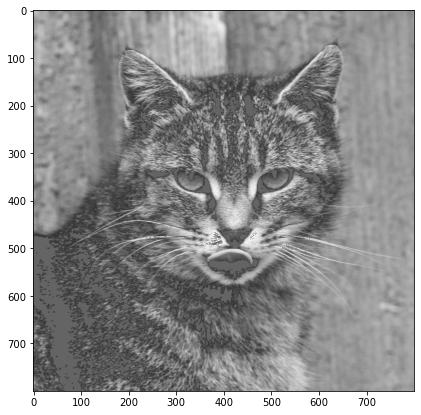

In [5]:
# min_pixel_depth = 50, max_pixel_depth = 250, replacement_val = 100

fig = plt.figure(figsize=(7, 7))

e1_output1 = subset_pixels(image = e1_img, min_pixel_depth = 50, max_pixel_depth = 250, replacement_val = 100)

plt.imshow(e1_output1, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output1.png')

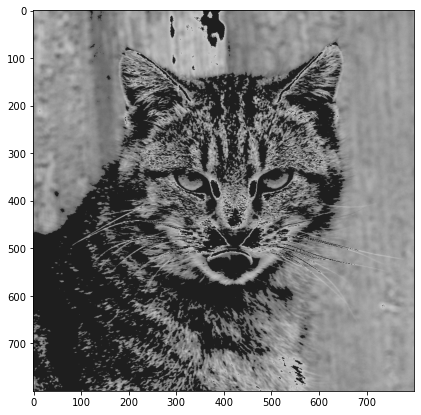

In [6]:
# min_pixel_depth = 100, max_pixel_depth = 200, replacement_val = 30

fig = plt.figure(figsize=(7, 7))

e1_output2 = subset_pixels(image = e1_img, min_pixel_depth = 100, max_pixel_depth = 200, replacement_val = 30)

plt.imshow(e1_output2, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output2.png')

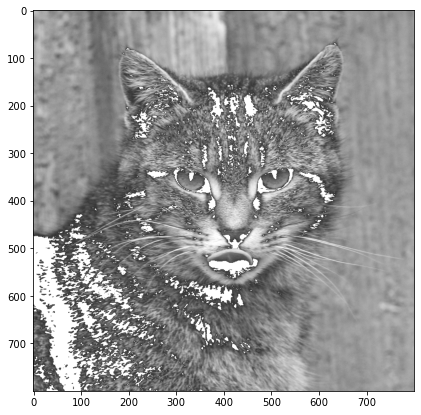

In [7]:
# min_pixel_depth = 50, max_pixel_depth = 255, replacement_val = 255

fig = plt.figure(figsize=(7, 7))

e1_output3 = subset_pixels(image = e1_img, min_pixel_depth = 50, max_pixel_depth = 255, replacement_val = 255)

plt.imshow(e1_output3, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output3.png')

### Exercise 2: Thumbnail generator function

<img src="lab3_exercise2.png" width="1000">

In [8]:
e2_img = mpimg.imread('sample_image_2.jpg')
e2_img = np.array(e2_img)     

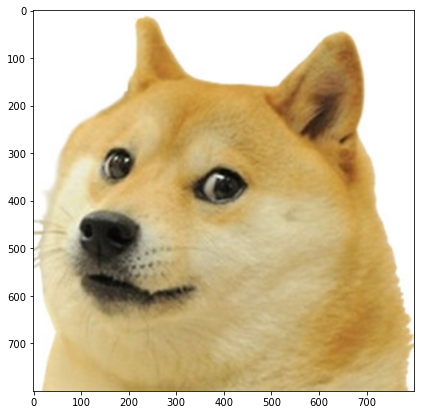

In [9]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e2_img)

In [10]:
def create_thumbnail(image, downsampling_rate):
    image = image.copy() # creates copy of image
    orig_height = image.shape[0] # variable for images height
    orig_width = image.shape[1] # variable for images width 
    new_height = round(orig_height/downsampling_rate)# new height of downsampled image
    new_width = round(orig_width/downsampling_rate) # new width of downsampled image
    output_image = np.zeros((new_height,new_width,3)) # zero array as a placeholder for downsampled image
    
    for i in range(0, orig_height,downsampling_rate): # iterates through height length of original image by the downsampling rate
        for j in range(0, orig_width,downsampling_rate): # iterates through the width of the original image by the downsampling rate
            for c in range(3): # iterates through all of 3d array 
                output_image[int(i/downsampling_rate),int(j/downsampling_rate),c] = np.mean(image[i : i+downsampling_rate, j : j+downsampling_rate,c])
                # ^^ sets output image values equal to the average of values within that downsampling rate
                
    output_image = output_image.astype('uint8') # converts our image to a 8 bit 
    
    # USE SEGMENT AVERAGE METHOD (Lecture slide 23) NOT PICK ONE METHOD
    # MAKE SURE YOU ROUND YOUR AVERAGED PIXELS TO INTEGER TO CONFORM TO RGB 8-BIT CODING 
    
    return output_image

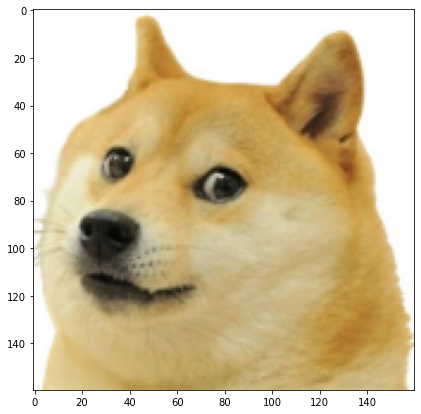

In [11]:
# downsampling rate x5

fig = plt.figure(figsize=(7, 7))

e2_output1 = create_thumbnail(image = e2_img, downsampling_rate = 5)

plt.imshow(e2_output1, vmin = 0, vmax = 255)

plt.savefig('e2_output1.png')

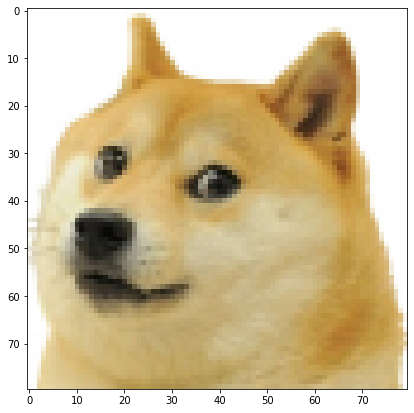

In [12]:
# downsampling rate x10

fig = plt.figure(figsize=(7, 7))

e2_output2 = create_thumbnail(image = e2_img, downsampling_rate = 10)

plt.imshow(e2_output2, vmin = 0, vmax = 255)

plt.savefig('e2_output2.png')

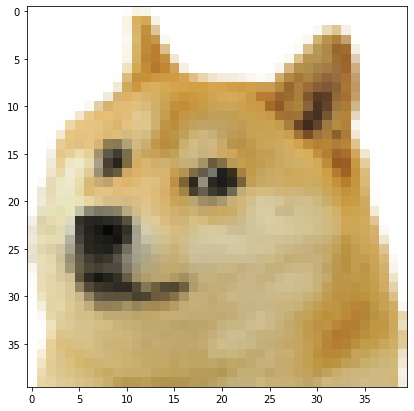

In [13]:
# downsampling rate x20

fig = plt.figure(figsize=(7, 7))

e2_output3 = create_thumbnail(image = e2_img, downsampling_rate = 20)

plt.imshow(e2_output3, vmin = 0, vmax = 255)

plt.savefig('e2_output3.png')

## Extra credit: Code efficiency
### Achieve a runtime speed of < 100ms

In [14]:
timeit -n 1 -r 7 e2_output2 = create_thumbnail(image = e2_img, downsampling_rate = 5)

739 ms ± 8.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 3: Generalized image blender function

<img src="lab3_exercise3.png" width="1000">

In [15]:
e3_img1 = mpimg.imread('sample_image_1.jpg')
e3_img2 = mpimg.imread('sample_image_2.jpg')
e3_img3 = mpimg.imread('sample_image_3.jpg')
e3_img4 = mpimg.imread('sample_image_4.jpg')
e3_img5 = mpimg.imread('sample_image_5.jpg')

e3_img1 = np.array(e3_img1)     
e3_img2 = np.array(e3_img2)     
e3_img3 = np.array(e3_img3)     
e3_img4 = np.array(e3_img4)     
e3_img5 = np.array(e3_img5)     

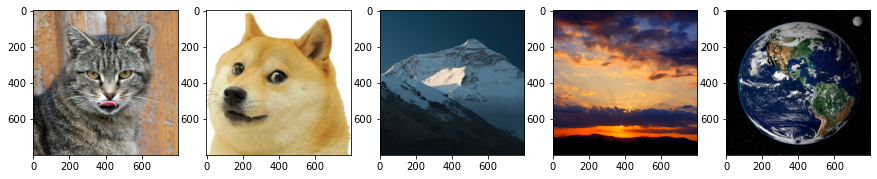

In [16]:
fig = plt.figure(figsize=(15, 15))

plt.subplot(1,5,1)
plt.imshow(e3_img1, vmin = 0, vmax = 255)

plt.subplot(1,5,2)
plt.imshow(e3_img2, vmin = 0, vmax = 255)

plt.subplot(1,5,3)
plt.imshow(e3_img3, vmin = 0, vmax = 255)

plt.subplot(1,5,4)
plt.imshow(e3_img4, vmin = 0, vmax = 255)

plt.subplot(1,5,5)
plt.imshow(e3_img5, vmin = 0, vmax = 255)

In [17]:
def blend_images(image_list, weight_list): 
    sample = image_list[0]# first image of the list
    output_image = np.zeros((sample.shape[0],sample.shape[1],sample.shape[2]))# creates output image restriction based on sample image
    for i in range(len(weight_list)):# iterates from i -length of weight list
        output_image = image_list[i]*weight_list[i] + output_image # multiples each image by there respective weight list values
    
    # YOUR CODE HERE
    output_image = output_image.astype('int')
    
    return output_image # returns blended image

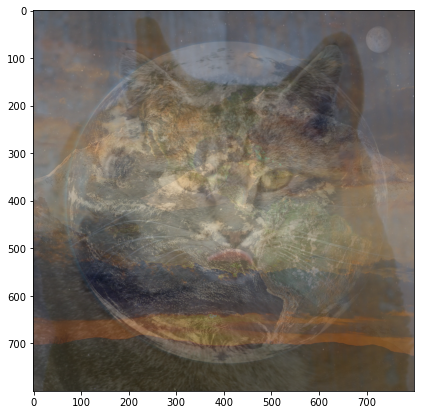

In [18]:
# Blend all 5 images with equal weights

e3_part1_image_list =[e3_img1, e3_img2, e3_img3, e3_img4, e3_img5]
e3_part1_weight_list = [0.2, 0.2, 0.2, 0.2, 0.2]

e3_output1 = blend_images(image_list = e3_part1_image_list, weight_list = e3_part1_weight_list)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e3_output1, vmin = 0, vmax = 255)

plt.savefig('e3_output1.png')

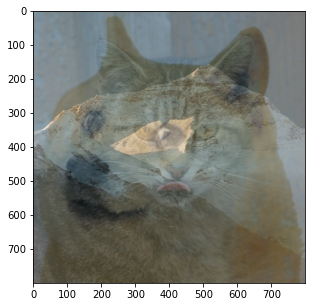

In [19]:
# Blend first 3 images with different weights

e3_part2_image_list =[e3_img1, e3_img2, e3_img3]
e3_part2_weight_list = [0.2, 0.3, 0.5]

e3_output2 = blend_images(image_list = e3_part2_image_list, weight_list = e3_part2_weight_list)

fig = plt.figure(figsize=(5, 5))

plt.imshow(e3_output2, vmin = 0, vmax = 255)

plt.savefig('e3_output2.png')

### Exercise 4: Image rotation function

<img src="lab3_exercise4.png" width="1000">

In [20]:
e4_img = mpimg.imread('sample_image_2.jpg')
e4_img = np.array(e4_img)     

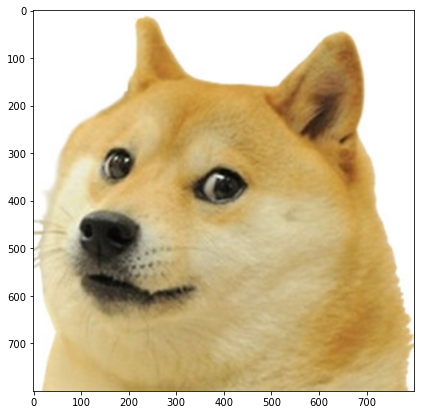

In [21]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_img, vmin = 0, vmax = 255)

In [22]:
def rotate_image(image, rotate_angle):# rotate angle takes one of 0, 90, 180, 270
    rads = math.radians(rotate_angle) # converts angle to radians
    output_image = np.zeros(image.shape)# creates an empty output image based on dimenstio
    height = output_image.shape[0]# height of our output image
    width  = output_image.shape[1]# width of our ouput image

    for i in range(height):# iterates throught the height
        for j in range(width):# iterates through the width 
            x= (i)*math.cos(rads)+(j)*-math.sin(rads) # matrix algebra to rotate image
            y= (i)*math.sin(rads)+(j)*math.cos(rads) # matrix algebra to rotate image

            x=round(x)# rounds our x
            y=round(y)# rounds our x
            output_image[i,j,:] = image[x,y,:]
            
    output_image = output_image.astype('int')

    return output_image # return rotated image

    # Make sure you create a copy of the image via new_image = image.copy() to avoid tempering the global variable
    

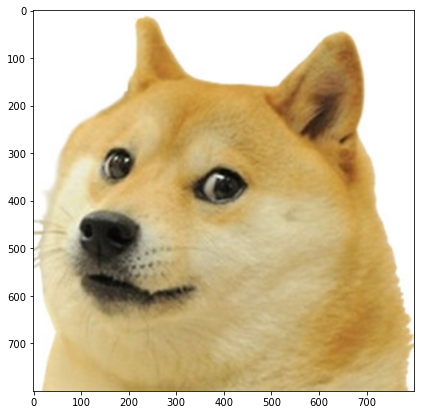

In [23]:
# Rotate the image by 0 degrees - This should result in identity

e4_output1 = rotate_image(image = e4_img, rotate_angle = 0)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output1, vmin = 0, vmax = 255)

plt.savefig('e4_output1.png')

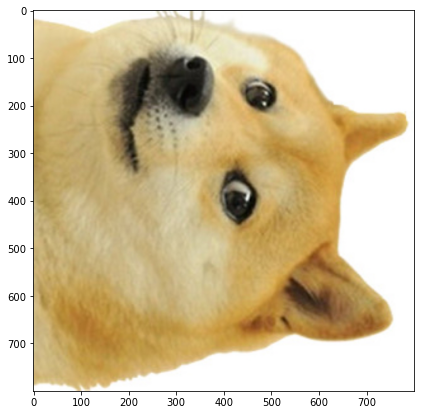

In [24]:
# Rotate the image by 90 degrees

e4_output2 = rotate_image(image = e4_img, rotate_angle = 90)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output2, vmin = 0, vmax = 255)

plt.savefig('e4_output2.png')

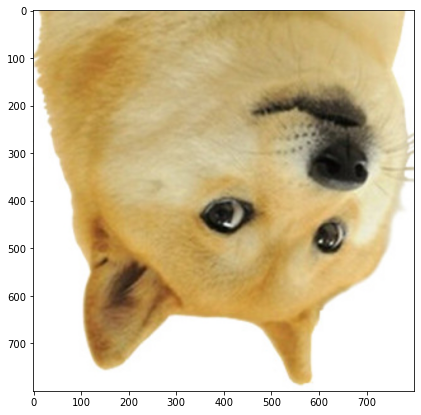

In [25]:
# Rotate the image by 180 degrees

e4_output3 = rotate_image(image = e4_img, rotate_angle = 180)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output3, vmin = 0, vmax = 255)

plt.savefig('e4_output3.png')

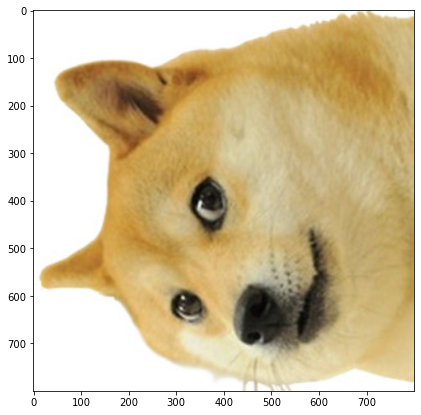

In [26]:
# Rotate the image by 270 degrees

e4_output4 = rotate_image(image = e4_img, rotate_angle = 270)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output4, vmin = 0, vmax = 255)

plt.savefig('e4_output4.png')

## Extra credit: Code efficiency
### Achieve a runtime speed of < 5ms

In [27]:
timeit -n 1 -r 7 e4_output2 = rotate_image(image = e4_img, rotate_angle = 90)

971 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 5: 2D Gaussian image generator

<img src="lab3_exercise5.png" width="1000">

In [28]:
x_range = np.arange(-25, 25, 1)
y_range = np.arange(-25, 25, 1)[::-1]

X, Y = np.meshgrid(x_range, y_range) # More detail on documentation 
                                     # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [29]:
print(X, X.shape) # Set of x-coordinates in the function domain     

[[-25 -24 -23 ...  22  23  24]
 [-25 -24 -23 ...  22  23  24]
 [-25 -24 -23 ...  22  23  24]
 ...
 [-25 -24 -23 ...  22  23  24]
 [-25 -24 -23 ...  22  23  24]
 [-25 -24 -23 ...  22  23  24]] (50, 50)


In [30]:
print(Y, Y.shape) # Set of y-coordinates in the function domain   

[[ 24  24  24 ...  24  24  24]
 [ 23  23  23 ...  23  23  23]
 [ 22  22  22 ...  22  22  22]
 ...
 [-23 -23 -23 ... -23 -23 -23]
 [-24 -24 -24 ... -24 -24 -24]
 [-25 -25 -25 ... -25 -25 -25]] (50, 50)


In [31]:
def vis_2d_gaussian(X, Y, sigma_x, sigma_y, x0, y0, A, cmap):# gaussian function
    partial_x = (X-x0)**2/(2*(sigma_x**2)) 
    partial_y = (Y-y0)**2/(2*(sigma_y**2))
    F_x_y = A*np.exp(-1*(partial_x+partial_y)) # gaussian equaion to create our shape
    
    return plt.imshow(F_x_y, cmap = cmap) # im show of gausian shape and set color
    #


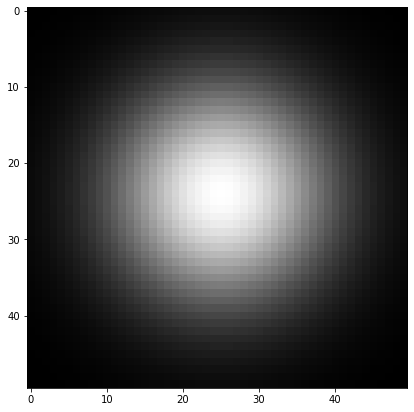

In [32]:
# First parameter set: sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0
# cmap = 'gray'

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0, A = 255, cmap = 'gray')

plt.savefig('e5_output1.png')

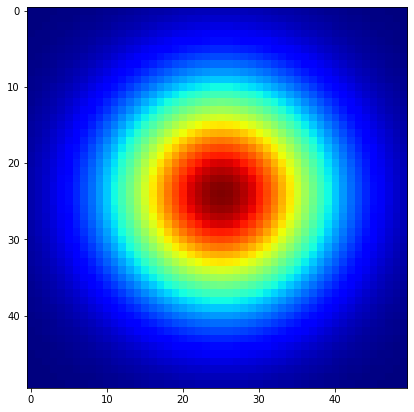

In [33]:
# First parameter set
# cmap = 'jet'

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0, A = 255, cmap = 'jet')

plt.savefig('e5_output2.png')

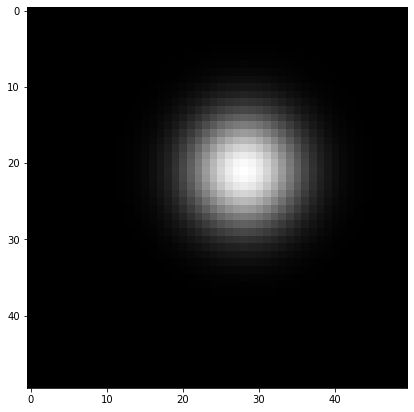

In [34]:
# Second parameter set: sigma_x = 5, sigma_y = 5, x0 = 3, y = 3
# grayscale color specturm

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 5, sigma_y = 5, x0 = 3, y0 = 3, A = 255, cmap = 'gray')

plt.savefig('e5_output1.png')

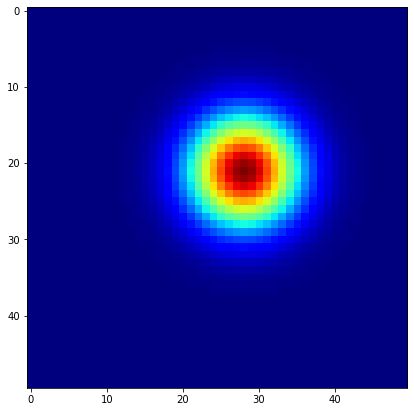

In [35]:
# Second parameter set: sigma_x = 5, sigma_y = 5, x0 = 3, y = 3
# jet color specturm

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 5, sigma_y = 5, x0 = 3, y0 = 3, A = 255, cmap = 'jet')

plt.savefig('e5_output2.png')